# Project 1 : Heart Disease Prediction 

Project done by : Sudhir Lalloo  

Date : 1 July to 15 July

Data Source : Kaggle - Heart Disease https://www.kaggle.com/ronitf/heart-disease-uci
 
Machine Learning Model 

Heart Disease Prediction  - Classification ( single class)

Various libraries using applied in Scikit Learn ML Library


# Predicting Heart Disease using Machine Learning

This notebook looks into various machine learning libraries and data science in attempt to build ML Model predicting if someone has heart disease or not. 
This includes pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

Based on medical attributes and history to predict heart disease

# Steps to the heart disease prediction using Machine Learning

1.Problem Definition

2.Data 

3.Model Evaluation

4.Features ( of the data)

5.Modelling

6.Experimentation

# Featured used for the prediction of heart disease  with Target Variable (0 = no heart disease and 1 as heart disease)
1.age

2.sex

3.chest pain type (4 values)

4.resting blood pressure

5.serum cholestoral in mg/dl

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by flourosopy

13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Steps
1.Problem Def

2.Data

3.Evaluation

#Create a data dictionary
age
age in years

sex
(1 = male; 0 = female)

cp
chest pain type

trestbps
resting blood pressure (in mm Hg on admission to the hospital)

chol
serum cholestoral in mg/dl

fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results

thalach
maximum heart rate achieved

exang
exercise induced angina (1 = yes; 0 = no)

oldpeak
ST depression induced by exercise relative to rest



In [119]:
#import all tools we need for our data analysis as well as visualization and machine learning modelling

#Regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models for Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, colums)

(303, 14)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Exploration (EDA - exploratory data analysis)
Check list :

1.What trying to solve?

2.What data we have to use and treat diff types?

3.Whats missing Data?

4.Where is outliers?

5.Add or remove features to get more out of data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

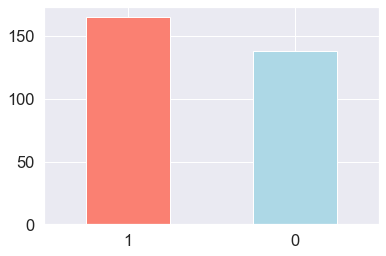

In [120]:
df["target"].value_counts().plot(kind="bar",color=["salmon", "lightblue"]);
plt.xticks(rotation=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# heart disease Frequency according to sex
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
#compare gender(sex) column to target column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


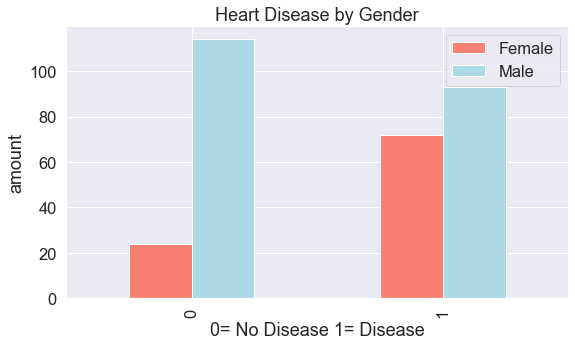

In [123]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",figsize=(9,5),color=["salmon", "lightblue"])
plt.title("Heart Disease by Gender")
plt.xlabel("0= No Disease 1= Disease")
plt.ylabel("amount")
plt.legend(["Female", "Male"])

In [15]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

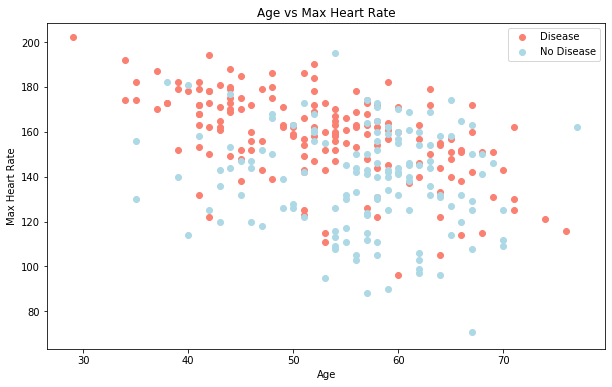

In [16]:
#Age vs Max Heart Rate
plt.figure(figsize=(10,6))
plt.scatter(df["age"][df["target"] ==1],df['thalach'][df.target==1], color="salmon")
plt.scatter(df["age"][df['target']==0],df['thalach'][df['target']==0],color='lightblue')
plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

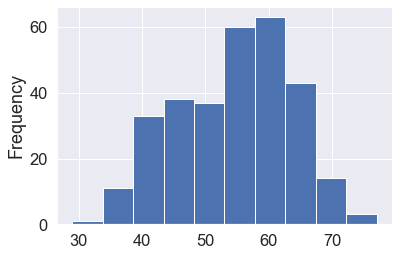

In [124]:
#check distribution of age across heart disease data
df['age'].plot.hist();

In [18]:
# Heart Disease Frequency - Chest Pain
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


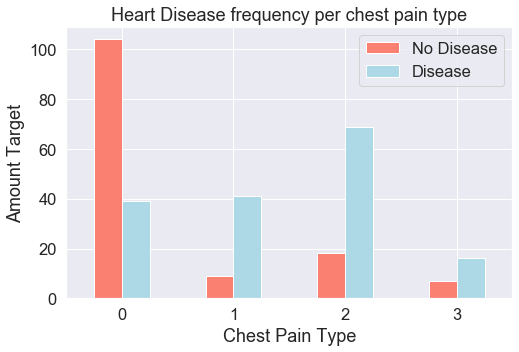

In [122]:
# Make this cross tab more visual
pd.crosstab(df['cp'],df['target']).plot(kind="bar",figsize=(8,5),color=["salmon","lightblue"]);
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount Target")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Making CORRELATION MATRIX - A WAY TO UNDERSTAND THE DATA BETTER.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

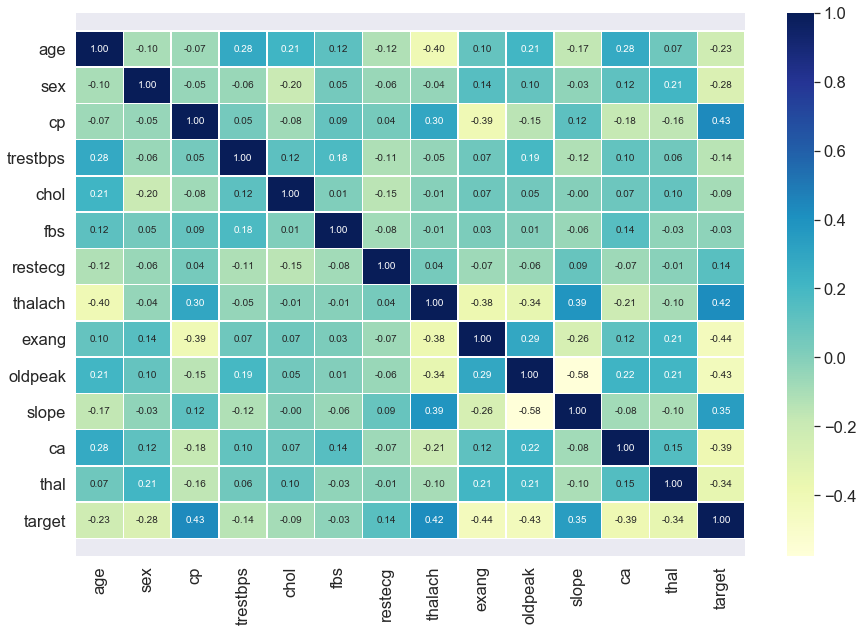

In [125]:
# Visualist the correlation to make for easier understanding
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5 , top -0.5)

# Start Modelling the data based on our evaluation ( if we can reach 95% accuracy to pursue this project)

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
#split data into X and y
X = df.drop('target', axis =1)
# target values 0 no heart disease and 1 heart disease
y=df['target'] 

In [26]:
np.random.seed(42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
len(y_train)

242

# Choosing the right model to build the right Machine Learning Model. Finding the patterns from the training model. Then testing it using the patterns on test data , the question is what machine learning model should we use.
Based on the info and using the map
3 models should be considered

1.Logistic Regression 

2.K -Nearest Neighbors

3.Random Forest Classifier

In [130]:
#Note Logistic Regression is also a model for classifcation hence per scikit learn you will identify this as part of classifcation
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create the function then fit and score the model accordingly
def fit_and_score(models, X_train , X_test, y_train, y_test):
    """Fits and Evaluates the models
    Models :a dict of diff SciKit Learn ML Models
    X_train : training data ( no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels"""
    
    #set random seed(42)
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    # look through models
    for name , model in models.items():
        # fit the model to the data
        model.fit(X_train , y_train)
        #evaluate the model and append its score to mode_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [31]:
model_scores = fit_and_score(models=models,
                             X_train=X_train, X_test = X_test,
                             y_train=y_train, y_test=y_test)

model_scores

C:\Users\Sudir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

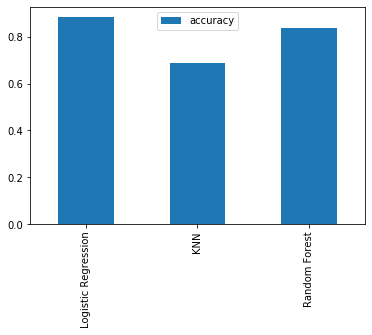

In [32]:
#model comparison to see which is most efficient and suitable

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

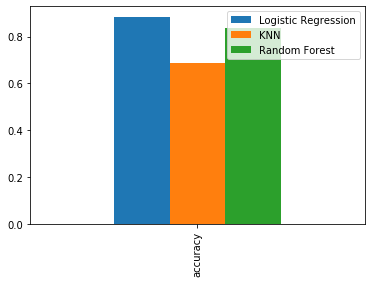

In [33]:
model_compare.plot.bar(); # not transposed 

# Tune and improving our model using Hyperparameter Tuning
Having the baseline model , it might not always be the expected model. 
Next steps what we can do is tune the model applying hyperparameter tuning.

Lets look at the following :

*Hyperparameter tuning

*Feature importance

*Confusion matrix

*cross validation

*Precision

*Recall

*F1 Score

*Classification report

*ROC Curve

*Area under the curve (AUC)

In [131]:
#NB: Hyperparameter tuning

# Tune KNeighborsClassifier (K-Nearest Neighbors or KNN)

train_scores = []
test_scores=[]

#create a list of different values for n_neighbors

neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#loop through difference n_neighbours

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(X_train, y_train)
    
    #update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    #update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
 test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on  test data : 75.41%


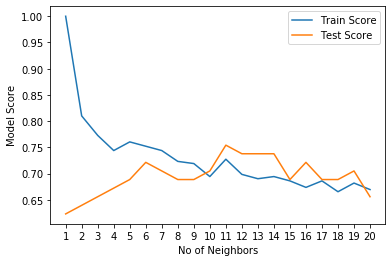

In [37]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on  test data : {max(test_scores)*100:.2f}%")

# Lets try Hyperparameter tuning with Randomized SearchCV

We going to tune:

Logistic Regression model()

RandomForestClassifier()

using RandomizedSearchCV....

In [38]:
# Create hyperparameter grid for LogisticRegression

log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}

#Create a Hyperparametergrid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth":[None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}


# taking the hyperparameter grids set up for each of our models tune them using RandomizedSearchCV

In [39]:
#Tune LogisticRegression
#set up the random seed of 42 
np.random.seed(42)
#set up random hyperparameter search for Logistic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit the random hyperparameter search model for Log Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
#Score the model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [72]:
# NOw to tune Random Forest 
np.random.seed(42)

#set up random hyper parameters for random forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
#fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   53.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [73]:
# Fiinding Best Parameters for Random Forest
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [74]:
#Evaluate the randomized search RandomForest Classifier model Score 

rs_rf.score(X_test, y_test)

0.8688524590163934

In [75]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. By Hand
2. RandomizedSearchCV
3. GridSearchCV

Conclusion from Above , Using Grid Search CV , Logistic Regression has the best outcome.

In [76]:
# Hyperparameter tuning with Gridsearch CV
#Since log regression provides best outcome we will try using again to improve
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#setup grid hyperparameter 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished


In [77]:
#check the best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [78]:
#Evaluate grid search  Logistic regression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [79]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Using model for LogisticRegression 
#Evaluate our tuned machine learning classifier
* ROC Curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1 - Score

....  if cross - validation was used where possible

In [80]:
y_preds = gs_log_reg.predict(X_test)

In [81]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

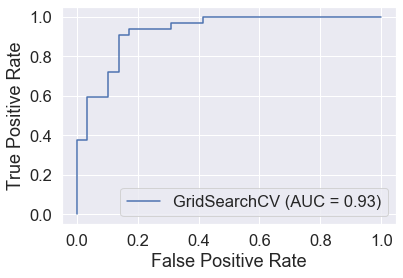

In [83]:
#Import ROC curve function from the sklearn metrics model
#plot the ROC curver and claculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [84]:
#Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


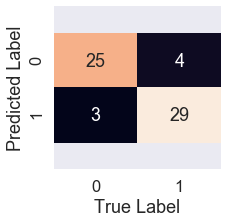

In [85]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots are nice looking confusion matrix
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5 , top -0.5)

plot_conf_mat(y_test, y_preds)

In [86]:
#Classification report , get a classifcaton report as well as a cross validated precision, recall and f1 score

In [87]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [88]:
#Calculate the evaluation metrics using cross validation

#WE going to calculate the precision , recall and F1 score of our model

In [89]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [90]:
#create a new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [91]:
# cross validated accuracy
cv_acc = cross_val_score(clf, X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [92]:

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [93]:
#cross validated precision
cv_precision = cross_val_score(clf, X,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [94]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [95]:
# cross validated recall

cv_recall = cross_val_score(clf, X,y,cv=5,scoring="recall")
cv_recall

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [96]:
# cross validated f1 - score
cv_f1 = cross_val_score(clf, X,y,cv=5,scoring="f1")
cv_f1

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [97]:
#Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall": cv_recall,
                          "F1":cv_f1},
                          index=[0])

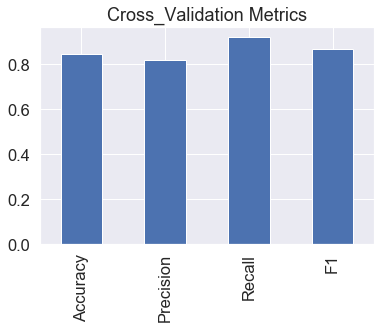

In [98]:
cv_metrics.T.plot.bar(title="Cross_Validation Metrics",legend=False)

# Looking at the feature importance
Is another way to enquire which features contributred to the outcomes of the model and how
did they contribute. How would this feature influence heart disease characterristics of a patient

Important to note the features differ for each machine learning model

In this Model we look for the feature importantance in our logistic regression model

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
#fit instance of LogisticRegression

gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, 
                         solver= 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
#check the coef (coefficient)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [111]:
# match coef's of features to columns Ipmportant to know this maps the column names to the  coef raay above
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [112]:
# Visualize feaature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


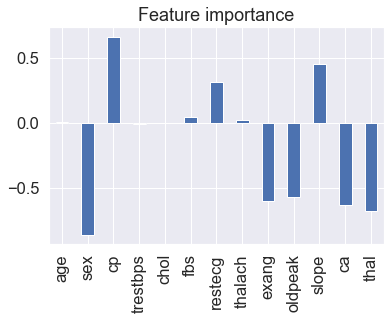

In [113]:
#plot the details
feature_df.T.plot.bar(title="Feature importance", legend=False)

Understanding the above data each feature's contribution to predicting the data on heart disease for patients

In some instance negative and some positive. understanding from the earlier correlation matrix can explain this in earlier graph

In [114]:
pd.crosstab(df["sex"], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [117]:
pd.crosstab(df['slope'] ,df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Slope of the peak ST Segment
0. upsloping - better heart rate
1. Flatsloping - which is minimal change
2. Downslopin - indication with unhealthy heart

Conclusion and Evaluation

Have we hit the 95% accuracy rate at predicting patient has heart disease or note. 

Questions to consider in conclusion of this end to end model for heart disease machine learning model

- Not meeting the 95% , we may need more data
- Consider speaking to subject matter expert , Doctor or someone in medical profession for recommendation if need
- tried a better model if theres one that could still work
- Consider XGBoost or CatBoost

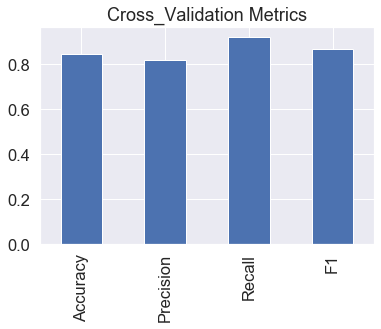

In [134]:
# In conclusion we would achieve the following on cross validated metrics
cv_metrics.T.plot.bar(title="Cross_Validation Metrics",legend=False);

# Conclusion 
Even though the targe 95% accuracy not reached , one could consider options mentioned above. The best case with current model is LogisticRegression.